<a href="https://www.kaggle.com/code/shivrajpublic/google-playstore-project?scriptVersionId=116284188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


Steps to perform:

Load the data file using pandas.

# Pandas:Data Cleaning
* Clean Data
* Clean Empty Cells
* Clean Wrong Format
* Clean Wrong Data
* Remove Duplicate

In [89]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# import the data
data=pd.read_csv('/kaggle/input/googleplaystore1/googleplaystore.csv')

# Know the data

# First Code

In [91]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# print rows & col
data.shape

(10841, 13)

In [6]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Check for null values in the data. Get the number of null values for each column.

# Drop records with nulls in any of the columns.

# Clean Empty Cells

In [92]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [93]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Clean Wrong Format

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [10]:
data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [94]:
def change_size(size):
    if 'M' in size:
        x=size[:-1] # 19M
        x=float(x)*1000
        return x
    if 'k' in size: 
        x=size[:-1] #20k
        x=float(x)
        return x
    else:
        return None

In [95]:
data['Size']=data['Size'].apply(change_size)

In [13]:
data['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [96]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [97]:
data['Size'].fillna(method='ffill',inplace=True)

In [98]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [17]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [99]:

data['Reviews'] = data['Reviews'].astype('int')

In [20]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

# WRONG DATA TRATMENT

In [100]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [101]:
data['Installs'] = data['Installs'].astype('int')

In [23]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [102]:
data['Price']=data['Price'].str.replace('$','')
data['Price']=data['Price'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [26]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [27]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
data[data['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
#Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.

In [30]:
len(data[data['Reviews'] > data['Installs']])

7

In [103]:
data[data['Reviews'] > data['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [104]:
# drop these rows index
data.drop(data[data['Reviews'] > data['Installs']].index,inplace=True)

In [105]:
len(data[data['Reviews'] > data['Installs']])

0

In [34]:
data.shape

(9353, 13)

In [106]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows
data[(data['Type'] == 'Free') & (data['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

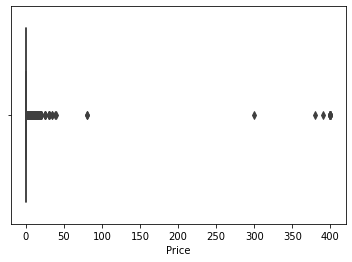

In [36]:
sns.boxplot(x='Price',data=data)
plt.show()

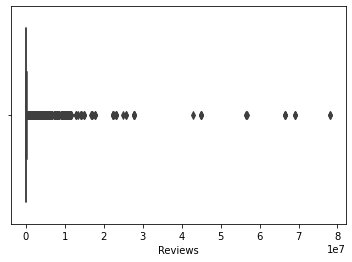

In [37]:
sns.boxplot(x='Reviews',data=data)
plt.show()

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

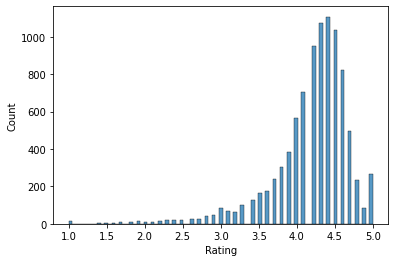

In [38]:
sns.histplot(x='Rating',data=data)
plt.show()

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

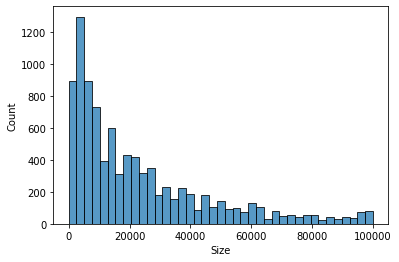

In [39]:
sns.histplot(x='Size',data=data)
plt.show()

 Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [107]:
data[data['Price']>200].size

195

In [41]:
data.shape

(9353, 13)

In [108]:
#Drop these as most seem to be junk apps
data.drop(data[data['Price']>200].index,inplace=True)

In [43]:
data.shape

(9338, 13)

#Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [109]:
data[data['Reviews'] >= 2000000].shape

(453, 13)

In [110]:
data.drop(data[data['Reviews'] >= 2000000].index, inplace = True)

In [46]:
data.shape

(8885, 13)

Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [47]:
data['Installs'].quantile([0.1,.25,.5,.7,.9,.95,.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [48]:
data[data['Installs']>100000000.0].shape

(20, 13)

In [111]:
data.drop(data[data['Installs']>=100000000.0].index,inplace=True)

In [50]:
data.shape

(8743, 13)

Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

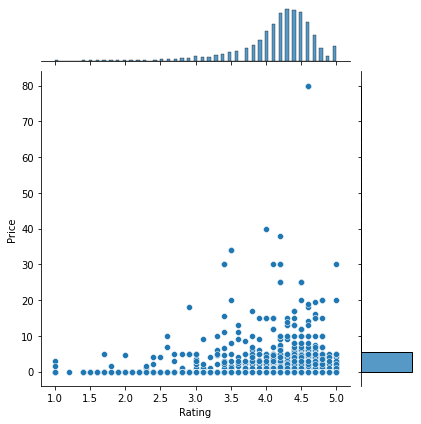

In [51]:
sns.jointplot(x='Rating',y='Price',data=data)
plt.show()

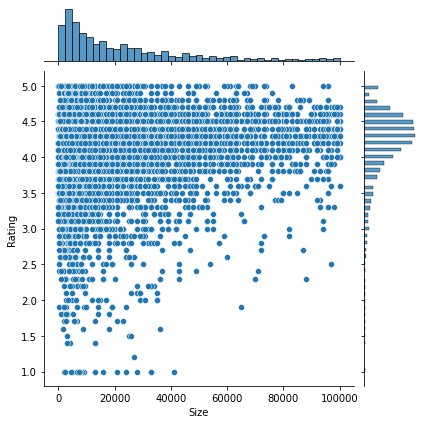

In [52]:
sns.jointplot(y='Rating',x='Size',data=data)
plt.show()

In [53]:
# Make scatter plot/joinplot for Rating vs. Reviews

# Does more review mean a better rating always?

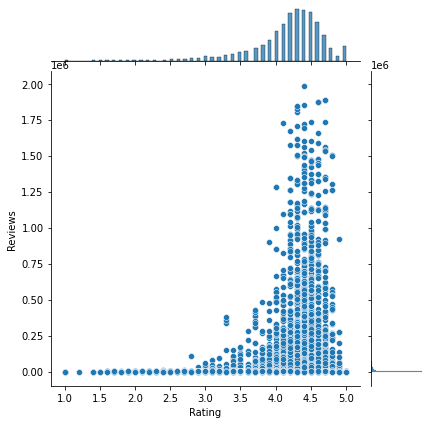

In [54]:
sns.jointplot(x='Rating',y='Reviews',data=data)
plt.show()

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

In [55]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

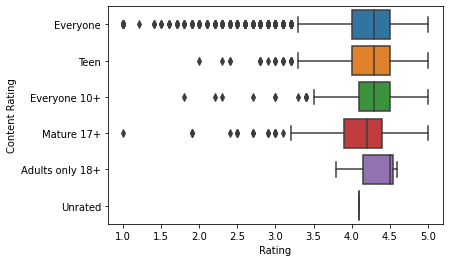

In [56]:
sns.boxplot(x='Rating',y='Content Rating',data=data)
plt.show()

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

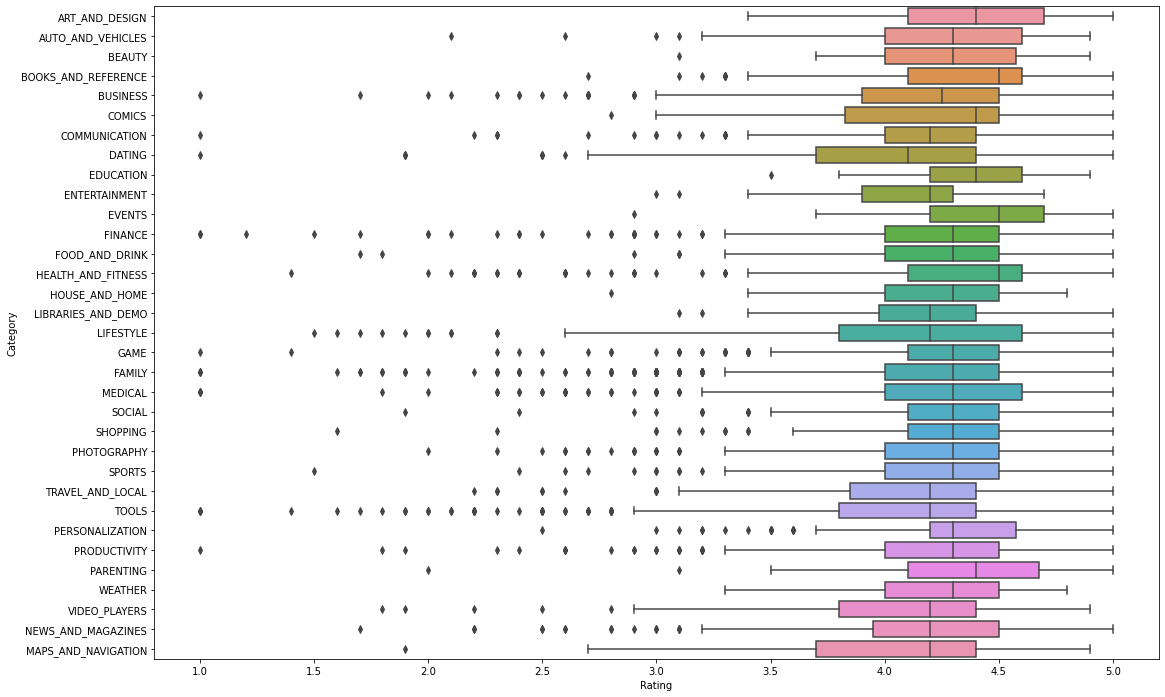

In [57]:
plt.figure(figsize=(18,12))
sns.boxplot(x='Rating',y='Category',data=data)
plt.show()

Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

12. Make predictions on test set and report R2.

In [58]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
# Data Preprocessing
#For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [112]:
inp1=data.copy()

In [61]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [114]:
inp1['Installs']=inp1['Installs'].apply(np.log1p)

In [115]:
inp1['Reviews']=inp1['Reviews'].apply(np.log1p)

In [116]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,2.323411,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,2.647760,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,2.798801,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,2.929995,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,2.526763,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [117]:
inp1.drop(['App','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [118]:
inp1.shape

(8743, 9)

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [119]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,2.323411,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,2.647760,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,2.798801,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,2.929995,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,2.526763,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,1.976385,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,2.253121,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,1.725463,Free,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,3600.0,2.067970,Free,0.0,Mature 17+,Books & Reference


In [120]:
inp1['Category'].value_counts()

FAMILY                 1698
GAME                    906
TOOLS                   693
MEDICAL                 349
FINANCE                 313
SPORTS                  313
LIFESTYLE               307
BUSINESS                300
PRODUCTIVITY            299
PERSONALIZATION         298
HEALTH_AND_FITNESS      295
PHOTOGRAPHY             274
COMMUNICATION           250
SOCIAL                  227
NEWS_AND_MAGAZINES      223
SHOPPING                218
TRAVEL_AND_LOCAL        211
DATING                  195
BOOKS_AND_REFERENCE     171
EDUCATION               151
VIDEO_PLAYERS           145
ENTERTAINMENT           137
MAPS_AND_NAVIGATION     120
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# convert categorical data into numeric 
# label encoding - blue black brown red yellow 0 1 2 3 4,   yes no 1 0
# dummy encoding- convert the data 0 and 1

# dummy variable/ One hot encoding           black
blue black brown red yellow
0     1     0     0    0
0     0     0     1    0
1     0     0     0    0


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [121]:
inp2=pd.get_dummies(inp1)

In [122]:
inp2.shape

(8743, 161)

In [69]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Extract features and target
y=inp2.pop('Rating')
X=inp2

In [124]:
X

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,2.323411,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,2.647760,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,2.798801,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281389,25000.0,2.929995,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800.0,2.526763,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2.079442,2600.0,1.976385,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.663562,53000.0,2.253121,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.609438,3600.0,1.725463,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.744932,3600.0,2.067970,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8743, dtype: float64

In [127]:
#Separate the dataframes into X_train, y_train, X_test, and y_test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [128]:
X_train.shape

(6120, 160)

In [129]:
X_test.shape

(2623, 160)

In [76]:
y_train.shape

(6120,)

In [77]:
y_test.shape

(2623,)

In [130]:
# Apply Linear Regression 
from sklearn.linear_model import LinearRegression # class
linear_reg=LinearRegression()

In [131]:
linear_reg.fit(X_train,y_train) # object is learning LR on training data

LinearRegression()

In [132]:
# pred 
y_pred=linear_reg.predict(X_test)

In [133]:
y_test # actual outcome of x test

313      4.1
7907     3.8
9825     4.2
5661     3.7
10048    4.2
        ... 
7924     4.3
5916     3.1
9071     4.0
10301    5.0
10148    4.2
Name: Rating, Length: 2623, dtype: float64

In [134]:
y_pred # actual outcome of x test

array([4.09176065, 3.95581445, 4.20600082, ..., 4.43240942, 4.24795989,
       4.12223975])

In [135]:
# print the error
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(y_test,y_pred))

MSE= 0.22878891777862262


In [136]:
# print the error
from sklearn.metrics import mean_squared_error
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE= 0.4783188453099278


In [137]:
# print r2 score
from sklearn.metrics import r2_score
print("R2 score=",r2_score(y_test,y_pred))

R2 score= 0.15418504812184586


In [138]:
# save the model
import joblib
joblib.dump(linear_reg,'Linear_Regression_model.sav')

In [139]:
# load the model
model=joblib.load('Linear_Regression_model.sav')

In [140]:
model.predict(X_test)

array([5.71940977, 5.22604079, 5.87412751, ..., 4.74418139, 5.02774532,
       5.76763675])